In [1]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_movies=pd.read_csv('/home/csc/my_first_environment/Movie_Recommend/movies.dat', sep="::",names=["MovieID","Title","Genres"],engine='python',encoding='latin-1',header=None,skiprows=1)
df_movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [3]:
df_ratings=pd.read_csv('/home/csc/my_first_environment/Movie_Recommend/ratings.dat', sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python',encoding='latin-1',header=None,skiprows=1)
df_ratings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [5]:
print(f'Movie dataframe Shape {df_movies.shape}')
print(f'Ratings dataframe Shape {df_ratings.shape}')
print(f'Users dataframe Shape {df_users.shape}')

Movie dataframe Shape (3883, 3)
Ratings dataframe Shape (1000209, 4)
Users dataframe Shape (6040, 5)


In [6]:
dfmovieratings=df_movies.merge(df_ratings,on='MovieID',how='inner')
dfmovieratings.shape

(1000209, 6)

In [7]:
dfMaster = dfmovieratings.merge(df_users,on="UserID",how='inner')
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp Gender  \
0           Animation|Children's|Comedy       1       5  978824268      F   
1  Animation|Children's|Musical|Romance       1       5  978824351      F   
2                                 Drama       1       5  978301777      F   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760      F   
4                             Drama|War       1       5  978824195      F   

   Age  Occupation Zip-code  
0    1          10    48067  
1    1          10    48067  
2    1          10    48067  
3    1          10    48067  
4    1          10    48067

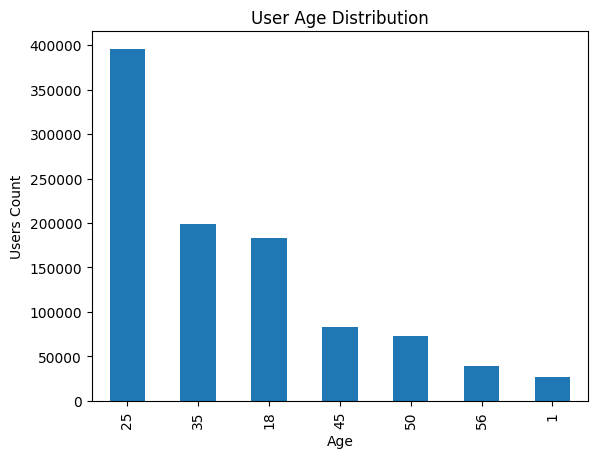

In [8]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

In [9]:
dfMaster['Age'].value_counts()/ len(dfMaster) * 100

Age
25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: count, dtype: float64

Observations
​
Here we can see thet 20% users are below 25 yrs of age.
Age group 25-34 contains around 40% of users.
90% users are below 50 yrs of age.


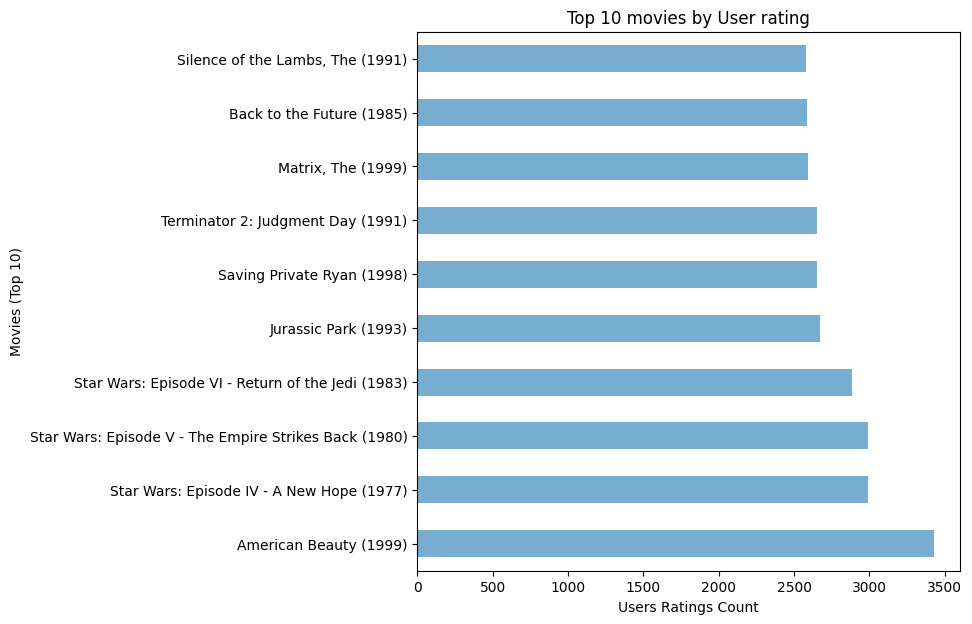

In [11]:
top10=dfMaster.groupby('Title').size().sort_values(ascending=False)[:10]
top10.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Users Ratings Count")
plt.ylabel("Movies (Top 10)")
plt.title("Top 10 movies by User rating")
plt.show()

The movie with maximum no. of ratings is American Beauty.


In [12]:
top5profession=dfMaster.groupby('Occupation').size().sort_values(ascending=False)[:5]
top5profession
# top5profession.plot(kind='barh',alpha=0.6,figsize=(7,7))
# plt.xlabel("Users Ratings Count")
# plt.ylabel("Movies (Top 25)")
# plt.title("Top 25 movies by User rating")
# plt.show()

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
dtype: int64

Observation 
​
1)college/grad student watch the most number of movies 
2)Other category people stand next to college grads

In [13]:
topGender=dfMaster.groupby('Gender').size().sort_values(ascending=False)[:5]
topGender

Gender
M    753769
F    246440
dtype: int64

Observation 
​
Most of rating is given Male

In [14]:
dfMaster['Timestamp'] = pd.to_datetime(dfMaster['Timestamp'], unit='s')
dfMaster['Year'] = dfMaster['Timestamp'].dt.year
dfMaster.drop(columns='Timestamp',inplace=True)


In [15]:
dfMaster

MovieID                                      Title  \
0              1                           Toy Story (1995)   
1             48                          Pocahontas (1995)   
2            150                           Apollo 13 (1995)   
3            260  Star Wars: Episode IV - A New Hope (1977)   
4            527                    Schindler's List (1993)   
...          ...                                        ...   
1000204     3513                 Rules of Engagement (2000)   
1000205     3535                     American Psycho (2000)   
1000206     3536                   Keeping the Faith (2000)   
1000207     3555                               U-571 (2000)   
1000208     3578                           Gladiator (2000)   

                                       Genres  UserID  Rating Gender  Age  \
0                 Animation|Children's|Comedy       1       5      F    1   
1        Animation|Children's|Musical|Romance       1       5      F    1   
2                                       Drama       1       5      F    1   
3             Action|Adventure|Fantasy|Sci-Fi       1       4      F    1   
4                                   Drama|War       1       5      F    1   
...                                       ...     ...     ...    ...  ...   
1000204                        Drama|Thriller    5727       4      M   25   
1000205                Comedy|Horror|Thriller    5727       2      M   25   
1000206                        Comedy|Romance    5727       5      M   25   
1000207                       Action|Thriller    5727       3      M   25   
1000208                          Action|Drama    5727       5      M   25   

         Occupation Zip-code  Year  
0                10    48067  2001  
1                10    48067  2001  
2                10    48067  2000  
3                10    48067  2000  
4                10    48067  2001  
...             ...      ...   ...  
1000204           4    92843  2000  
1000205           4    92843  2000  
1000206           4    92843  2000  
1000207           4    92843  2000  
1000208           4    92843  2000  

[1000209 rows x 10 columns]

In [16]:
dfMaster['Year'].value_counts()

Year
2000    904757
2001     68058
2002     24046
2003      3348
Name: count, dtype: int64

Observation

2000 Year as highest Rating

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
# Creating a pivot table of movie titles & user id and imputing the NaN values
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Assuming 'Liar Liar (1997)' has MovieID 123
liar_liar_ratings = movie_ratings['Liar Liar (1997)']

# Reshape both arrays to have the same number of features (columns)
liar_liar_ratings_reshaped = liar_liar_ratings.values.reshape(1, -1)

movie_ratings_reshaped = movie_ratings.T.values

# Calculate Cosine Similarity
similarities = cosine_similarity(movie_ratings_reshaped, liar_liar_ratings_reshaped)

# Get the indices of movies similar to 'Liar Liar'
similar_movies_indices = similarities.argsort(axis=0)[:-4:-1].flatten()

#Get the titles of the top 3 similar movies
top_similar_movies = movie_ratings.columns[similar_movies_indices]

print("Top 3 movies similar to 'Liar Liar':")

print(top_similar_movies)

Top 3 movies similar to 'Liar Liar':
Index(['Liar Liar (1997)', 'Mrs. Doubtfire (1993)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Title')


In [64]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating a pivot table of movie titles & user id and imputing the NaN values
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Calculate the Pearson Correlation
item_correlation = 1 - pairwise_distances(movie_ratings.T, metric='correlation')

# Convert the NumPy array to a Pandas DataFrame
item_correlation_df = pd.DataFrame(item_correlation, columns=movie_ratings.columns, index=movie_ratings.columns)

# Write the DataFrame to a CSV file
item_correlation_df.to_csv('item_correlation.csv')

# Function to get top N similar movies based on Pearson Correlation
def get_top_similar_movies(movie_title, n=5):
    movie_idx = movie_ratings.columns.get_loc(movie_title)
    similar_scores = item_correlation[movie_idx]
    top_similar_movies = np.argsort(similar_scores)[::-1][:n]
    return movie_ratings.columns[top_similar_movies]

# Example: Get top 5 movies similar to 'Liar Liar (1997)'
movie_title = 'Liar Liar (1997)'
top_similar_movies = get_top_similar_movies(movie_title, n=5)
    
print(f"\nTop 5 movies similar to '{movie_title}':")
print(top_similar_movies)

(3706,)

Top 5 movies similar to 'Liar Liar (1997)':
Index(['Liar Liar (1997)', 'Mrs. Doubtfire (1993)', 'Dumb & Dumber (1994)',
       'Ace Ventura: Pet Detective (1994)', 'Home Alone (1990)'],
      dtype='object', name='Title')


In [31]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Assuming your DataFrame is named dfMaster
# Replace 'your_file_path.csv' with the actual path to your dataset
# dfMaster = pd.read_csv('your_file_path.csv')

# Creating a pivot table of movie titles & user id and imputing the NaN values
movie_ratings = dfMaster.pivot_table(index='UserID', columns='Title', values='Rating', fill_value=0)

# Calculate the Cosine Similarity
item_similarity_matrix = cosine_similarity(movie_ratings.T)

# Print the item similarity matrix
print("\nItem Similarity Matrix:")
print(item_similarity_matrix)

# Create a Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(movie_ratings.T)

# Function to get top N similar movies using Nearest Neighbors and Cosine Similarity
def get_top_similar_movies_nn(movie_title, n=5):
    movie_idx = movie_ratings.columns.get_loc(movie_title)
    _, indices = nn_model.kneighbors([movie_ratings.T.iloc[movie_idx]], n_neighbors=n+1)
    top_similar_movies = movie_ratings.columns[indices.flatten()][1:]
    return top_similar_movies

# Example: Get top 5 movies similar to 'Liar Liar (1997)' using Nearest Neighbors and Cosine Similarity
movie_title = 'Liar Liar (1997)'
top_similar_movies_nn = get_top_similar_movies_nn(movie_title, n=5)

print(f"\nTop 5 movies similar to '{movie_title}' using Nearest Neighbors and Cosine Similarity:")
print(top_similar_movies_nn)


Item Similarity Matrix:
[[1.         0.07235746 0.03701053 ... 0.         0.12024178 0.02700277]
 [0.07235746 1.         0.11528952 ... 0.         0.         0.07780705]
 [0.03701053 0.11528952 1.         ... 0.         0.04752635 0.0632837 ]
 ...
 [0.         0.         0.         ... 1.         0.         0.04564448]
 [0.12024178 0.         0.04752635 ... 0.         1.         0.04433508]
 [0.02700277 0.07780705 0.0632837  ... 0.04564448 0.04433508 1.        ]]

Top 5 movies similar to 'Liar Liar (1997)' using Nearest Neighbors and Cosine Similarity:
Index(['Mrs. Doubtfire (1993)', 'Ace Ventura: Pet Detective (1994)',
       'Dumb & Dumber (1994)', 'Home Alone (1990)', 'Wayne's World (1992)'],
      dtype='object', name='Title')


/home/csc/my_first_environment/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [68]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns



# Define a Reader object
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset
data = Dataset.load_from_df(dfMaster[['UserID', 'Title', 'Rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create and train the SVD model
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE and MAPE
rmse = accuracy.rmse(predictions)
mae_value = accuracy.mae(predictions)
mape = mae_value / 5.0 * 100 

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


liar_liar_internal_id = trainset.to_inner_iid('Liar Liar (1997)')

# Get the latent factors for 'Liar Liar (1997)'
liar_liar_embedding = model.qi[liar_liar_internal_id]

# Find movies similar to 'Liar Liar' based on embeddings
similar_movies_indices = (model.qi @ liar_liar_embedding.T).argsort(axis=0)[::-1].flatten()

# Print the top 5 movies similar to 'Liar Liar'
top_similar_movies = dfMaster['Title'].iloc[similar_movies_indices[1:6]]
print("\nTop 5 movies similar to 'Liar Liar (1997)' based on embeddings:")
print(top_similar_movies)

RMSE: 0.8753
MAE:  0.6873
Root Mean Squared Error (RMSE): 0.8753499629703873
Mean Absolute Percentage Error (MAPE): 13.746726792931169

Top 5 movies similar to 'Liar Liar (1997)' based on embeddings:
1201         Lethal Weapon 2 (1989)
997     Prince of Egypt, The (1998)
935       Driving Miss Daisy (1989)
1446      Lawrence of Arabia (1962)
718          Man on the Moon (1999)
Name: Title, dtype: object
